## Data augmentation for positive positive images 
##### The dataset is imbalanced: there are ~21.7k images without crack (train: 17.4k, test: 4345) and ~2.6k with crack (train: 2087, test: 521)
##### New images have been generated using rotation and horizontal/vertical flip, saved in 'Train/augmentation' folder and moved into 'Train/Cracked' folder. The new training set is balanced (~17.4k images for each class)
##### Here an example of image augmentation is reported

In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras

from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


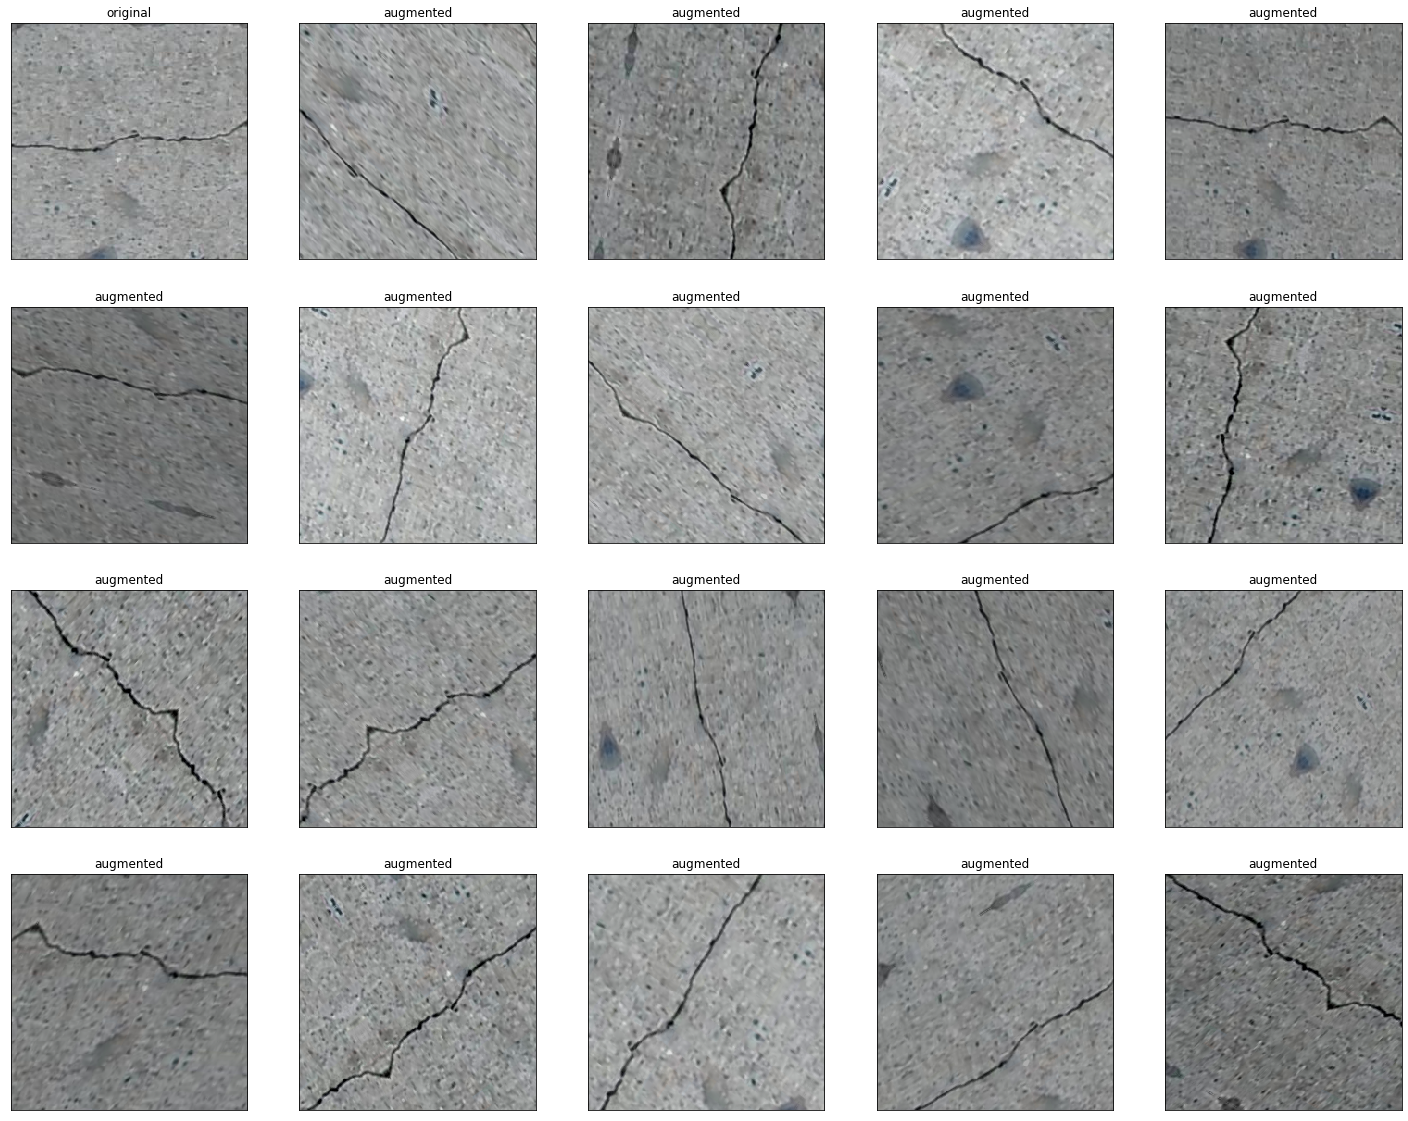

In [2]:
path='/storage/Crack_detection/Dataset2/Crack_detection/Dataset2/Pavements/Train/Cracked_original'
list_images=os.listdir(path)
image_index=-2

image_original = load_img(os.path.join(path,list_images[image_index]))
image_original = img_to_array(image_original)
# expand dimension to one sample
img = np.expand_dims(image_original, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(
        height_shift_range=0.3,
        width_shift_range=0.3,
        shear_range=45,
        zoom_range=0.2,
        rotation_range=90,
        channel_shift_range=50.0,
        brightness_range=[0.6,1],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect' )
# prepare iterator
it = datagen.flow(img, batch_size=1)
# generate samples and plot
plt.figure(figsize=(25,20))
plt.subplot(4,5,1)
plt.imshow(image_original.astype('uint8'))
plt.title('original')
plt.xticks([])
plt.yticks([])
for i in range(19):
    plt.subplot(4,5,i+2)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.title('augmented')
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()